## Heart disease prediction

In [1]:
# Dataset1 - Heart
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('HeartDzData.csv')

print(df.head())

   Age  Sex  CP  RestBP  Chol  FBS  RestECG  Heartbeat  Exang  Oldpeak  Slope  \
0   63    1   3     145   233    1        0        150      0      2.3      0   
1   37    1   2     130   250    0        1        187      0      3.5      0   
2   41    0   1     130   204    0        0        172      0      1.4      2   
3   56    1   1     120   236    0        1        178      0      0.8      2   
4   57    0   0     120   354    0        1        163      1      0.6      2   

   Target  
0       1  
1       1  
2       1  
3       1  
4       1  


# Overview of the data

In [3]:
# Use the describe function to get a statistical overview of the data
# It includes count, mean, standard deviation, minimum, 25th percentile (Q1),
# median (50th percentile or Q2), 75th percentile (Q3), and maximum values.)
data_description = df.describe()

# Print the result
print(data_description)

              Age         Sex          CP      RestBP        Chol         FBS  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          RestECG   Heartbeat       Exang     Oldpeak       Slope      Target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.544554  
std      0.525860   22.905161 

# Bar plots of patients with and without heart diseases.

In [4]:
# Get bar plots of patients with and without heart diseases.
# Count the number of patients with and without heart diseases
target_counts = df['Target'].value_counts()
print(target_counts)

Target
1    165
0    138
Name: count, dtype: int64


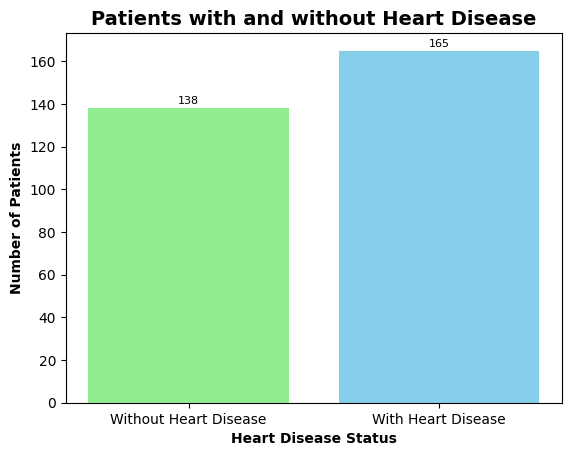

In [5]:
# Plotting the bar plot
fig, ax = plt.subplots()
bars = plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightgreen'])

# Adding count labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=8)

plt.title('Patients with and without Heart Disease', fontweight='bold', fontsize=14)
plt.xlabel('Heart Disease Status', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.xticks(target_counts.index, ['With Heart Disease', 'Without Heart Disease'])
plt.show()

# Check if there are any null (empty/missing) values in the dataset

In [6]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Print the result
print("Null Values in the Heart Dataset:")
print(null_values)

Null Values in the Heart Dataset:
Age          0
Sex          0
CP           0
RestBP       0
Chol         0
FBS          0
RestECG      0
Heartbeat    0
Exang        0
Oldpeak      0
Slope        0
Target       0
dtype: int64


# Relationship between any pair of parameters between patients with and without heart diseases

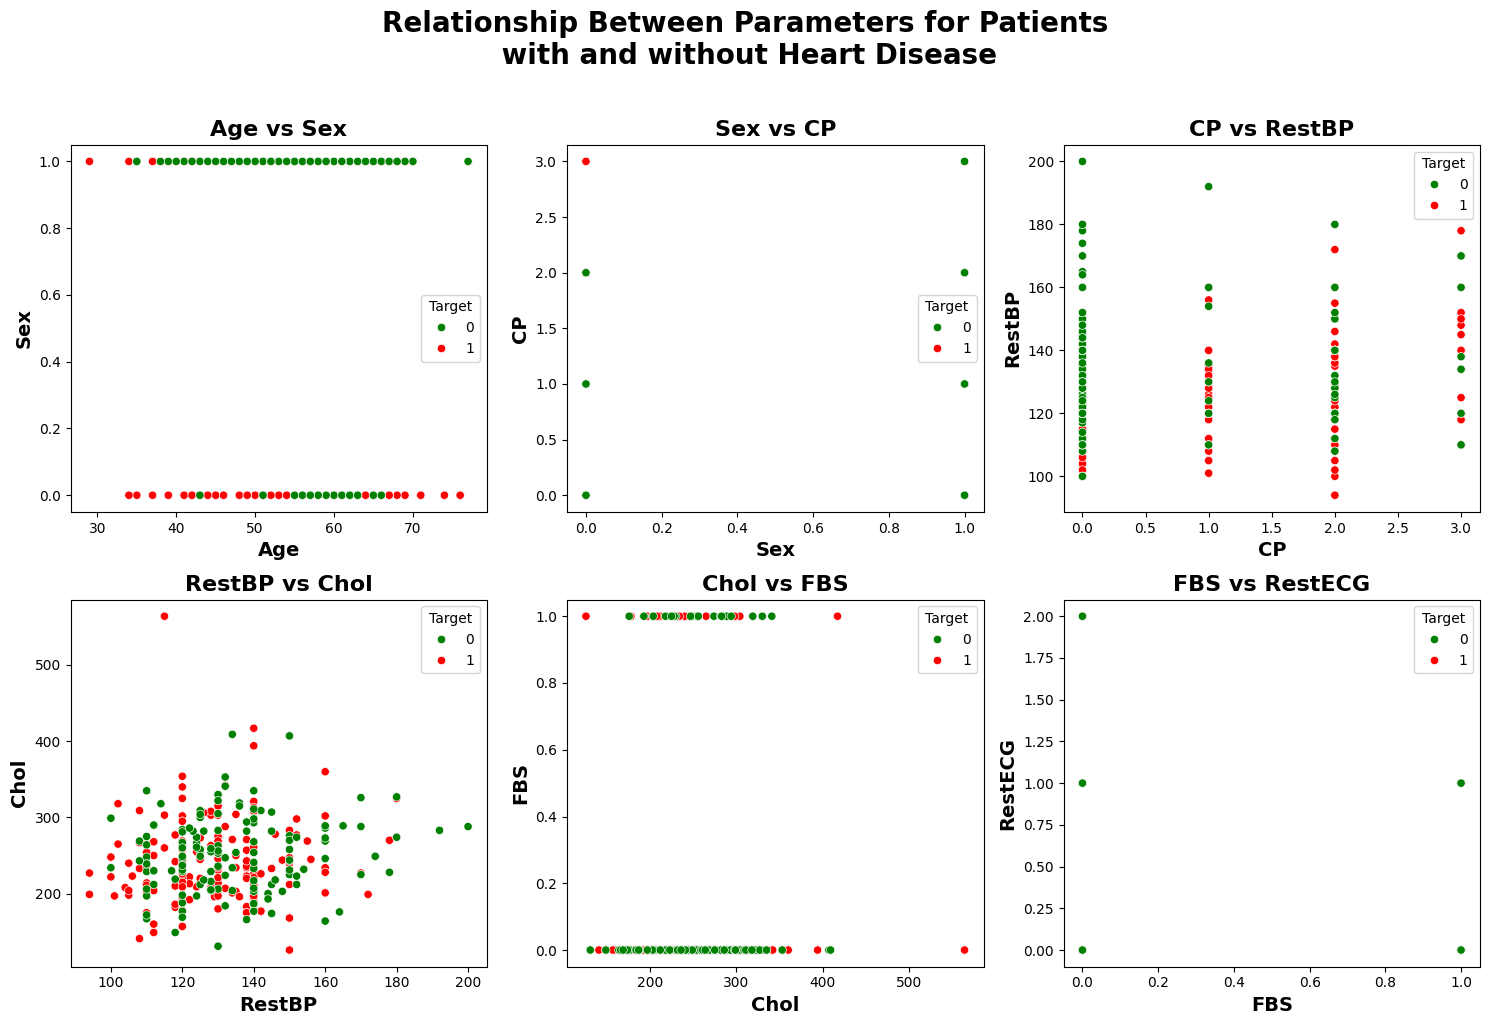

In [7]:
# Create 6 subplots (2 rows, 3 columns) to observe the relationship between any pair of
# parameters between patients with and without heart diseases

target_col = 'Target'

# Selecting only numeric columns for pair plots
numeric_cols = df.select_dtypes(include='number').columns

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Relationship Between Parameters for Patients\n with and without Heart Disease", y=1.02, fontweight='bold', fontsize=20)

# Plotting scatter plots for each pair of parameters
for i, ax in enumerate(axes.flatten()):
    if i < len(numeric_cols):
        sns.scatterplot(x=numeric_cols[i], y=numeric_cols[(i + 1) % len(numeric_cols)],
                        hue=target_col, data=df, ax=ax, palette={0: 'green', 1: 'red'})
        ax.set_xlabel(numeric_cols[i], fontweight='bold', fontsize=14)
        ax.set_ylabel(numeric_cols[(i + 1) % len(numeric_cols)], fontweight='bold', fontsize=14)
        ax.set_title(f'{numeric_cols[i]} vs {numeric_cols[(i + 1) % len(numeric_cols)]}', fontweight='bold', fontsize=16, ha='center')


# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])

# Show the plots
plt.show()


# Scatter plot between 'Age' and 'Heartbeat'

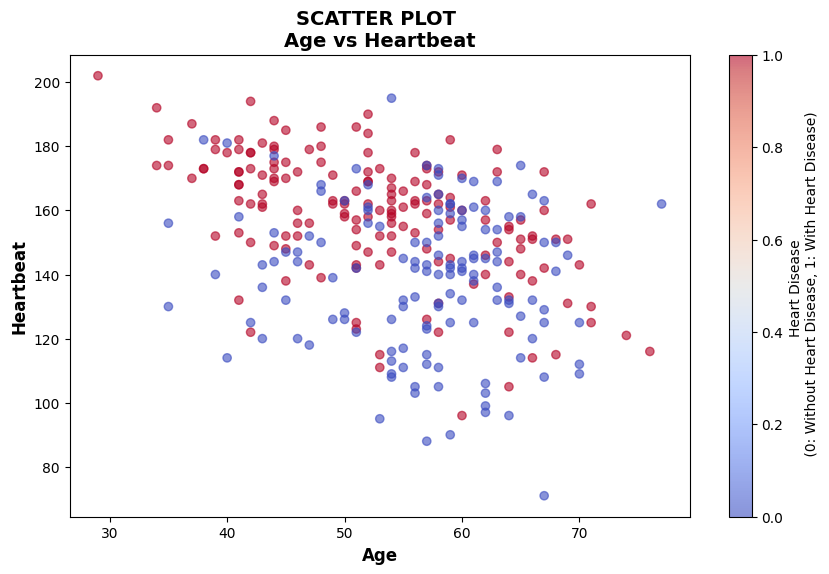

In [8]:
# Scatter plot between 'Age' and 'Heartbeat'
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Heartbeat'], c=df['Target'], cmap='coolwarm', alpha=0.6)

# Adding labels and title
plt.title('SCATTER PLOT \nAge vs Heartbeat',fontweight='bold', fontsize=14)
plt.xlabel('Age',fontweight='bold', fontsize=12)
plt.ylabel('Heartbeat',fontweight='bold', fontsize=12)
plt.colorbar(label='Heart Disease \n (0: Without Heart Disease, 1: With Heart Disease)')

# Display the plot
plt.show()

# Heat Map

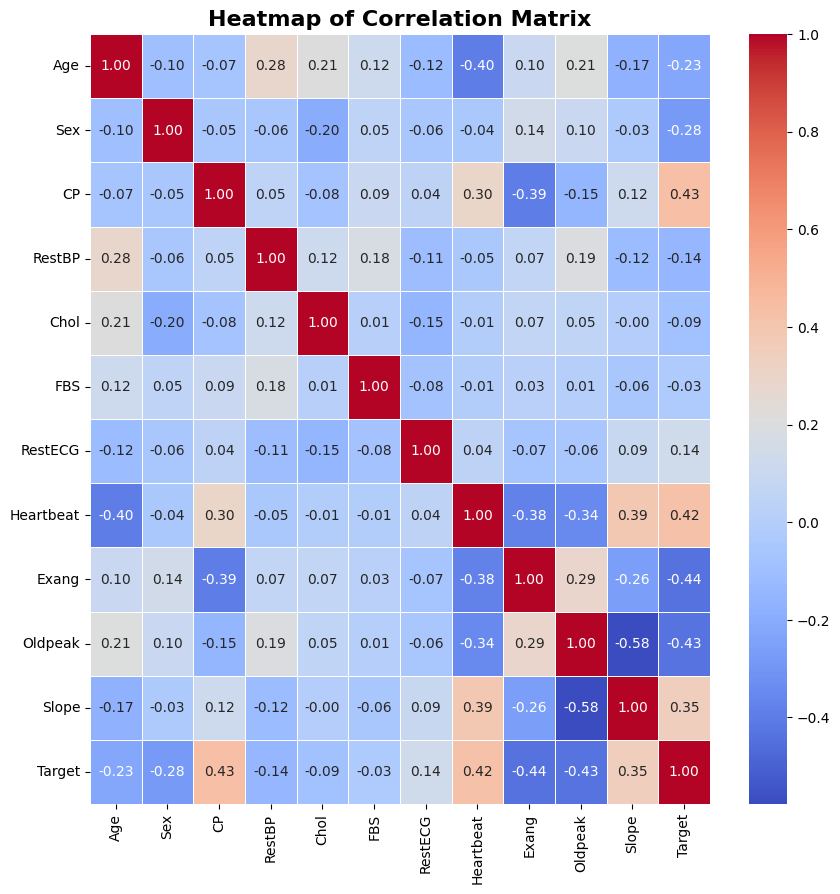

In [9]:
# Generate a heat map to display correlation between variables
# Creating a correlation matrix
correlation_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Heatmap of Correlation Matrix', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

# Logistic Regression

In [10]:
# Train a logistic regression model to predict heart disease.
# Split the dataset into features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train_scaled)

# Make predictions on the test set
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_pred_train)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy results
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}')

# Print confusion matrix and classification report for the test set
print('\nConfusion Matrix (Test Set):')
print(confusion_matrix(y_test, y_pred_test))

print('\nClassification Report (Test Set):')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.8140
Test Accuracy: 0.8525

Confusion Matrix (Test Set):
[[24  8]
 [ 1 28]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.78      0.97      0.86        29

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



# Prediction for new Input data

In [11]:
# Make predictions for the new input data
input_data = (63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 1)
input_data_as_nparray = np.asarray(input_data)
input_data_reshaped = input_data_as_nparray.reshape(1, -1)
prediction = model.predict(input_data_reshaped)

# Print the prediction
print(prediction)

# Interpret the prediction
if prediction == 0:
    print("The patient is predicted to not have heart disease.")
else:
    print("The patient is predicted to have heart disease.")

[0]
The patient is predicted to not have heart disease.
